# **Dataset Description** 📃
Dataset source: [UCI](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset)

<h3>About Dataset 📁</h3> 

<img src = "https://cdn-icons-png.flaticon.com/512/2162/2162407.png" width = 100, height = 100>

This synthetic dataset is modeled after an existing ***milling machine*** and consists of **10,000 data points** stored as rows with **14 features** in columns:



1. `UID`: unique identifier ranging from 1 to 10000.
2. `product ID`: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number.
3. `type`: just the product type L, M or H from column 2.
4. `air temperature` [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
5. `process temperature` [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

for more information about random walk process used in `air temperature`, and `process temperature`, check [this link](https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/).

6. `rotational speed` [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.
7. `torque` [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
8. `tool wear` [min]: (breakdown and gradual failure of a cutting tool due to regular operation) The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
9. a '`machine failure`' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
The machine failure consists of five independent failure modes:


> **Tool wear failure** (`TWF`): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

> **Heat dissipation failure** (`HDF`): heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

> **Power failure** (`PWF`): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

> **Overstrain failure** (`OSF`): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

> **Random failures** (`RNF`): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.



If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

This dataset is part of the following publication:
S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74:.

**Acronyms:**

* [K]: kelvin
* [rpm]: revolutions per minute
* [Nm]: newton-meter
* [min]: minutes


---

# **Getting started** ⏭


## Install and import the required libraries ⏬

In [3]:
# !pip uninstall -y pandas-profiling --quiet
# !pip install -U pandas-profiling --quiet
# !pip install seaborn --quiet
# !pip install scikit-learn --quiet
# !pip install scipy --quiet
# !pip install graphviz --quiet
# !pip install imblearn --quiet

# !pip install -U -q ipywidgets --quiet
# !pip install jupyter_contrib_nbextensions --quiet
# !pip install jupyter_nbextensions_configurator --quiet
# !jupyter contrib nbextension install --user
# !jupyter nbextensions_configurator enable --user
# !jupyter nbextension enable --py widgetsnbextension

In [13]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import pickle
import graphviz
import imblearn
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Data Collection** 🛍️

![Data Collection](https://assets-global.website-files.com/5dcc6210881da483dfe6cda8/61397d83f9c6f3b80eead6ba_data_collection1000.png)


## Load the dataset 💽

In [14]:
# Load the dataset
dataset_path = './ai4i2020.csv'
df = pd.read_csv(dataset_path)

In [15]:
# Total number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 10000
Number of columns: 14


**Number of datapoints: 10000**

**Number of columns: 14**

In [16]:
print("Following is the list of columns in the dataset:")
df.columns.tolist()

Following is the list of columns in the dataset:


['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [17]:
df.head(10)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   
9   10     M14869    M                298.5                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   
5                    1425         41.9               11                0    0   
6                    1558         42.4               14                0    0   
7                    1527         40.2               16                0    0   
8                    1667         28.6               18                0    0   
9                    1741         28.0               21                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  
5    0    0    0    0  
6    0    0    0    0  
7    0    0    0    0  
8    0    0    0    0  
9    0    0    0    0

# **Data Preparation and Visualization** ⚙️📊

![Data Preparation](https://assets-global.website-files.com/5dcc6210881da483dfe6cda8/61397e167f416a5e011efd03_data_prep1000.png)
![Data Visualization](https://assets-global.website-files.com/5dcc6210881da483dfe6cda8/6139821fd645bb4f12375d97_dataviz1000.png)

## Exploratory data analysis 🔍

In [18]:
# Rename dataset columns
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [19]:
# Drop UDI and Product ID columns {EW}
df.drop(['Product ID', 'UDI'], axis=1, inplace=True)

In [20]:
df.head(10)

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   
2    L            298.1                308.5              1498    49.4   
3    L            298.2                308.6              1433    39.5   
4    L            298.2                308.7              1408    40.0   
5    M            298.1                308.6              1425    41.9   
6    L            298.1                308.6              1558    42.4   
7    L            298.1                308.6              1527    40.2   
8    M            298.3                308.7              1667    28.6   
9    M            298.5                309.0              1741    28.0   

   Tool wear  Machine failure  TWF  HDF  PWF  OSF  RNF  
0          0                0    0    0    0    0    0  
1          3                0    0    0    0    0    0  
2          5                0    0    0    0    0    0  
3          7                0    0    0    0    0    0  
4          9                0    0    0    0    0    0  
5         11                0    0    0    0    0    0  
6         14                0    0    0    0    0    0  
7         16                0    0    0    0    0    0  
8         18                0    0    0    0    0    0  
9         21                0    0    0    0    0    0

In [21]:
# there are no null values, as it turns out {EW}
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [22]:
# MIN, MAX, AVERAGE, MEDIAN, STANDARD DEVIATION, VARIANCE, COUNT
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

count        mean         std     min     25%     50%  \
Air temperature      10000.0   300.00493    2.000259   295.3   298.3   300.1   
Process temperature  10000.0   310.00556    1.483734   305.7   308.8   310.1   
Rotational speed     10000.0  1538.77610  179.284096  1168.0  1423.0  1503.0   
Torque               10000.0    39.98691    9.968934     3.8    33.2    40.1   
Tool wear            10000.0   107.95100   63.654147     0.0    53.0   108.0   
Machine failure      10000.0     0.03390    0.180981     0.0     0.0     0.0   
TWF                  10000.0     0.00460    0.067671     0.0     0.0     0.0   
HDF                  10000.0     0.01150    0.106625     0.0     0.0     0.0   
PWF                  10000.0     0.00950    0.097009     0.0     0.0     0.0   
OSF                  10000.0     0.00980    0.098514     0.0     0.0     0.0   
RNF                  10000.0     0.00190    0.043550     0.0     0.0     0.0   

                        75%     max  
Air temperature       301.5   304.5  
Process temperature   311.1   313.8  
Rotational speed     1612.0  2886.0  
Torque                 46.8    76.6  
Tool wear             162.0   253.0  
Machine failure         0.0     1.0  
TWF                     0.0     1.0  
HDF                     0.0     1.0  
PWF                     0.0     1.0  
OSF                     0.0     1.0  
RNF                     0.0     1.0

In [23]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

count unique top  freq
Type  10000      3   L  6000

Plot the distribution for each attribute, We can see that the data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)


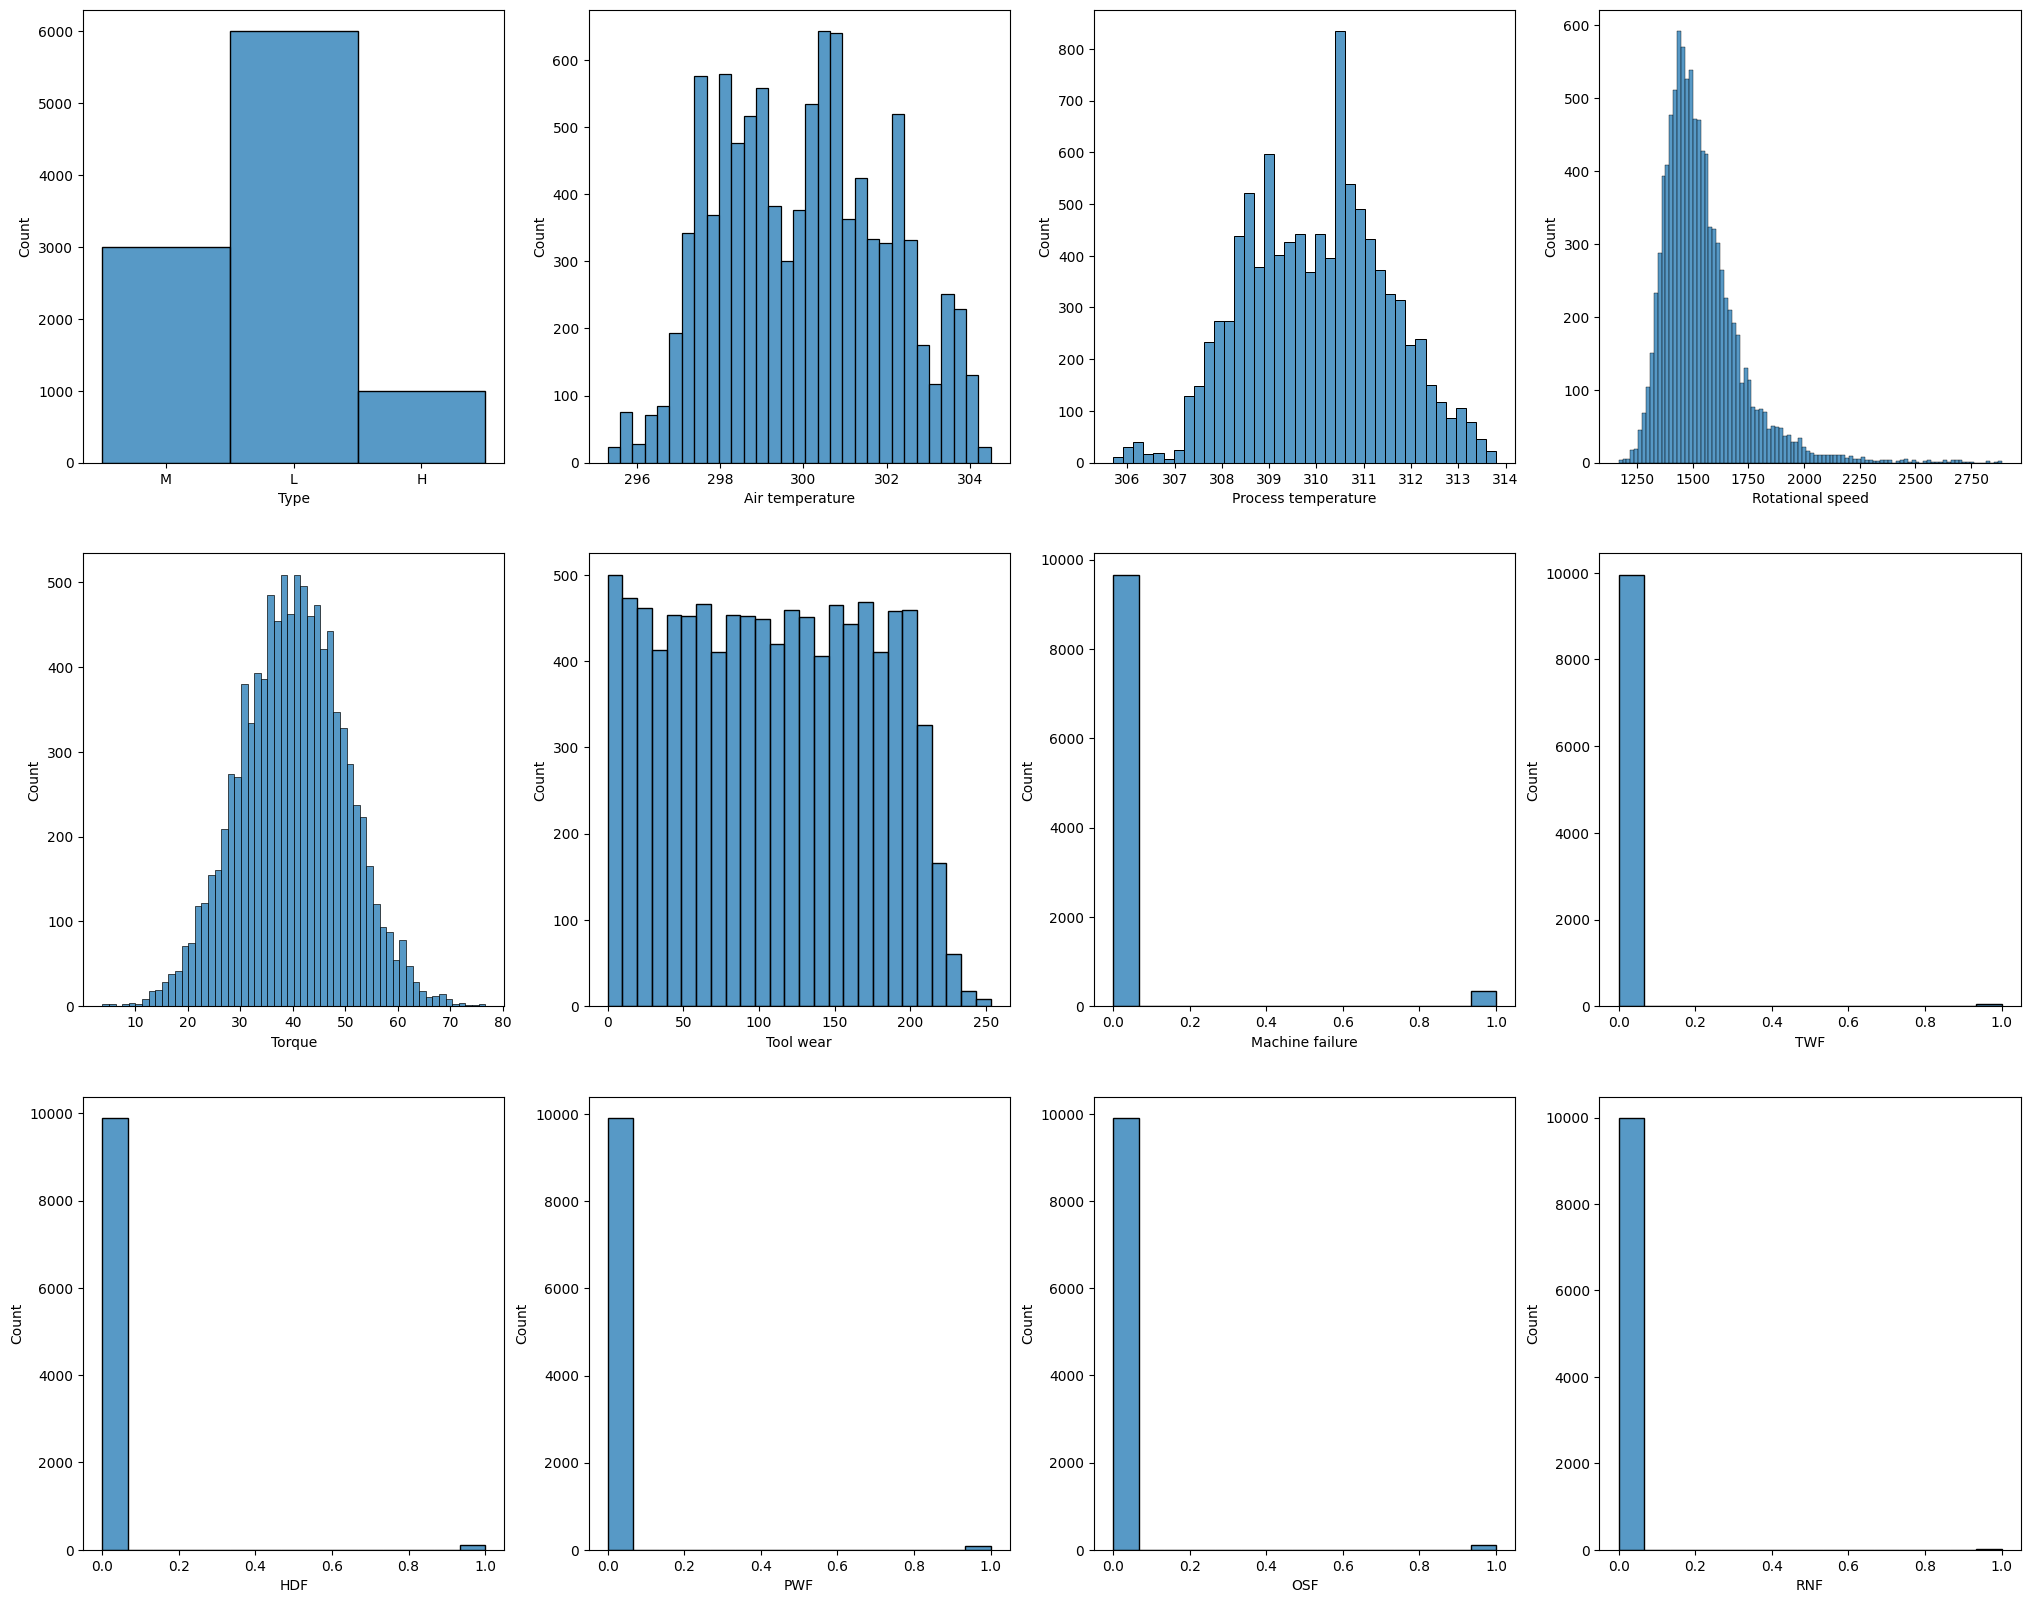

In [24]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

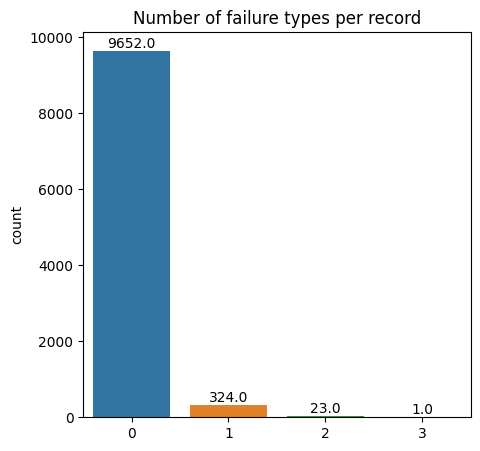

In [25]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

As shown above, **348** records contain more than one type of failure, but their count is very small compared to the entire data set, so we will combine the failure types into one feature. The individual failure types are then dropped.

> No failure = 0

> TWF = HDF = PWF = OSF = RNF = 1


In [26]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

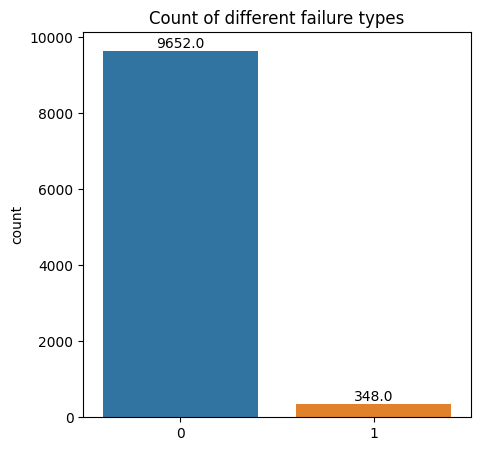

In [27]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

We can derive a new attribute using this formula:

$Power = Torque \times Rotational \ speed$

In [28]:
df['Power'] = df[['Rotational speed', 'Torque']].product(axis=1)

<Axes: xlabel='Power', ylabel='Count'>

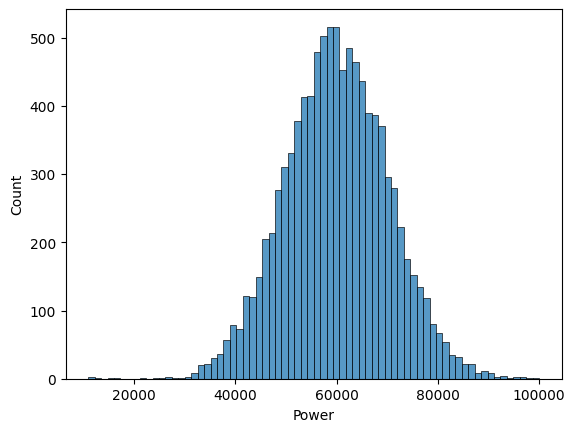

In [29]:
# Plot the histogram of Power attribute
sns.histplot(df['Power'])

## Data type conversion ⛓️

In [30]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)

In [31]:
# turn all columns into float for easier processing later
for column in df.columns:
    df[column] = df[column].astype(float)

In [32]:
# view columns data types
df.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
Power                  float64
dtype: object

## Handling outliers ❗

In [33]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

Calculate and handle the outliers for each attribute using IQR and Winsorization 

In [34]:
for col in df.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] <= (Q1 - 1.5 * IQR)) | (df[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          df.drop(outliers.index, inplace=True)

Density-Based Anomaly Detection (LOF)

In [35]:
from sklearn.neighbors import LocalOutlierFactor

# create the LOF model
model = LocalOutlierFactor(n_neighbors=5)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(df)

# identify the outlier rows (those with a negative score) and remove them
outliers = df[scores == -1]
if not outliers.empty:
    df.drop(outliers.index, inplace=True)

In [36]:
df.shape # after removing the outliers

(9400, 8)

## More Transformation ⛏️

Normalize the attributes using z-score

$z = \frac{x - \mu} {\sigma}$, $\mu:$ Mean, $σ:$ Standard deviation

In [37]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        df[col] = zscore(df[col])

## More visualizations 📊

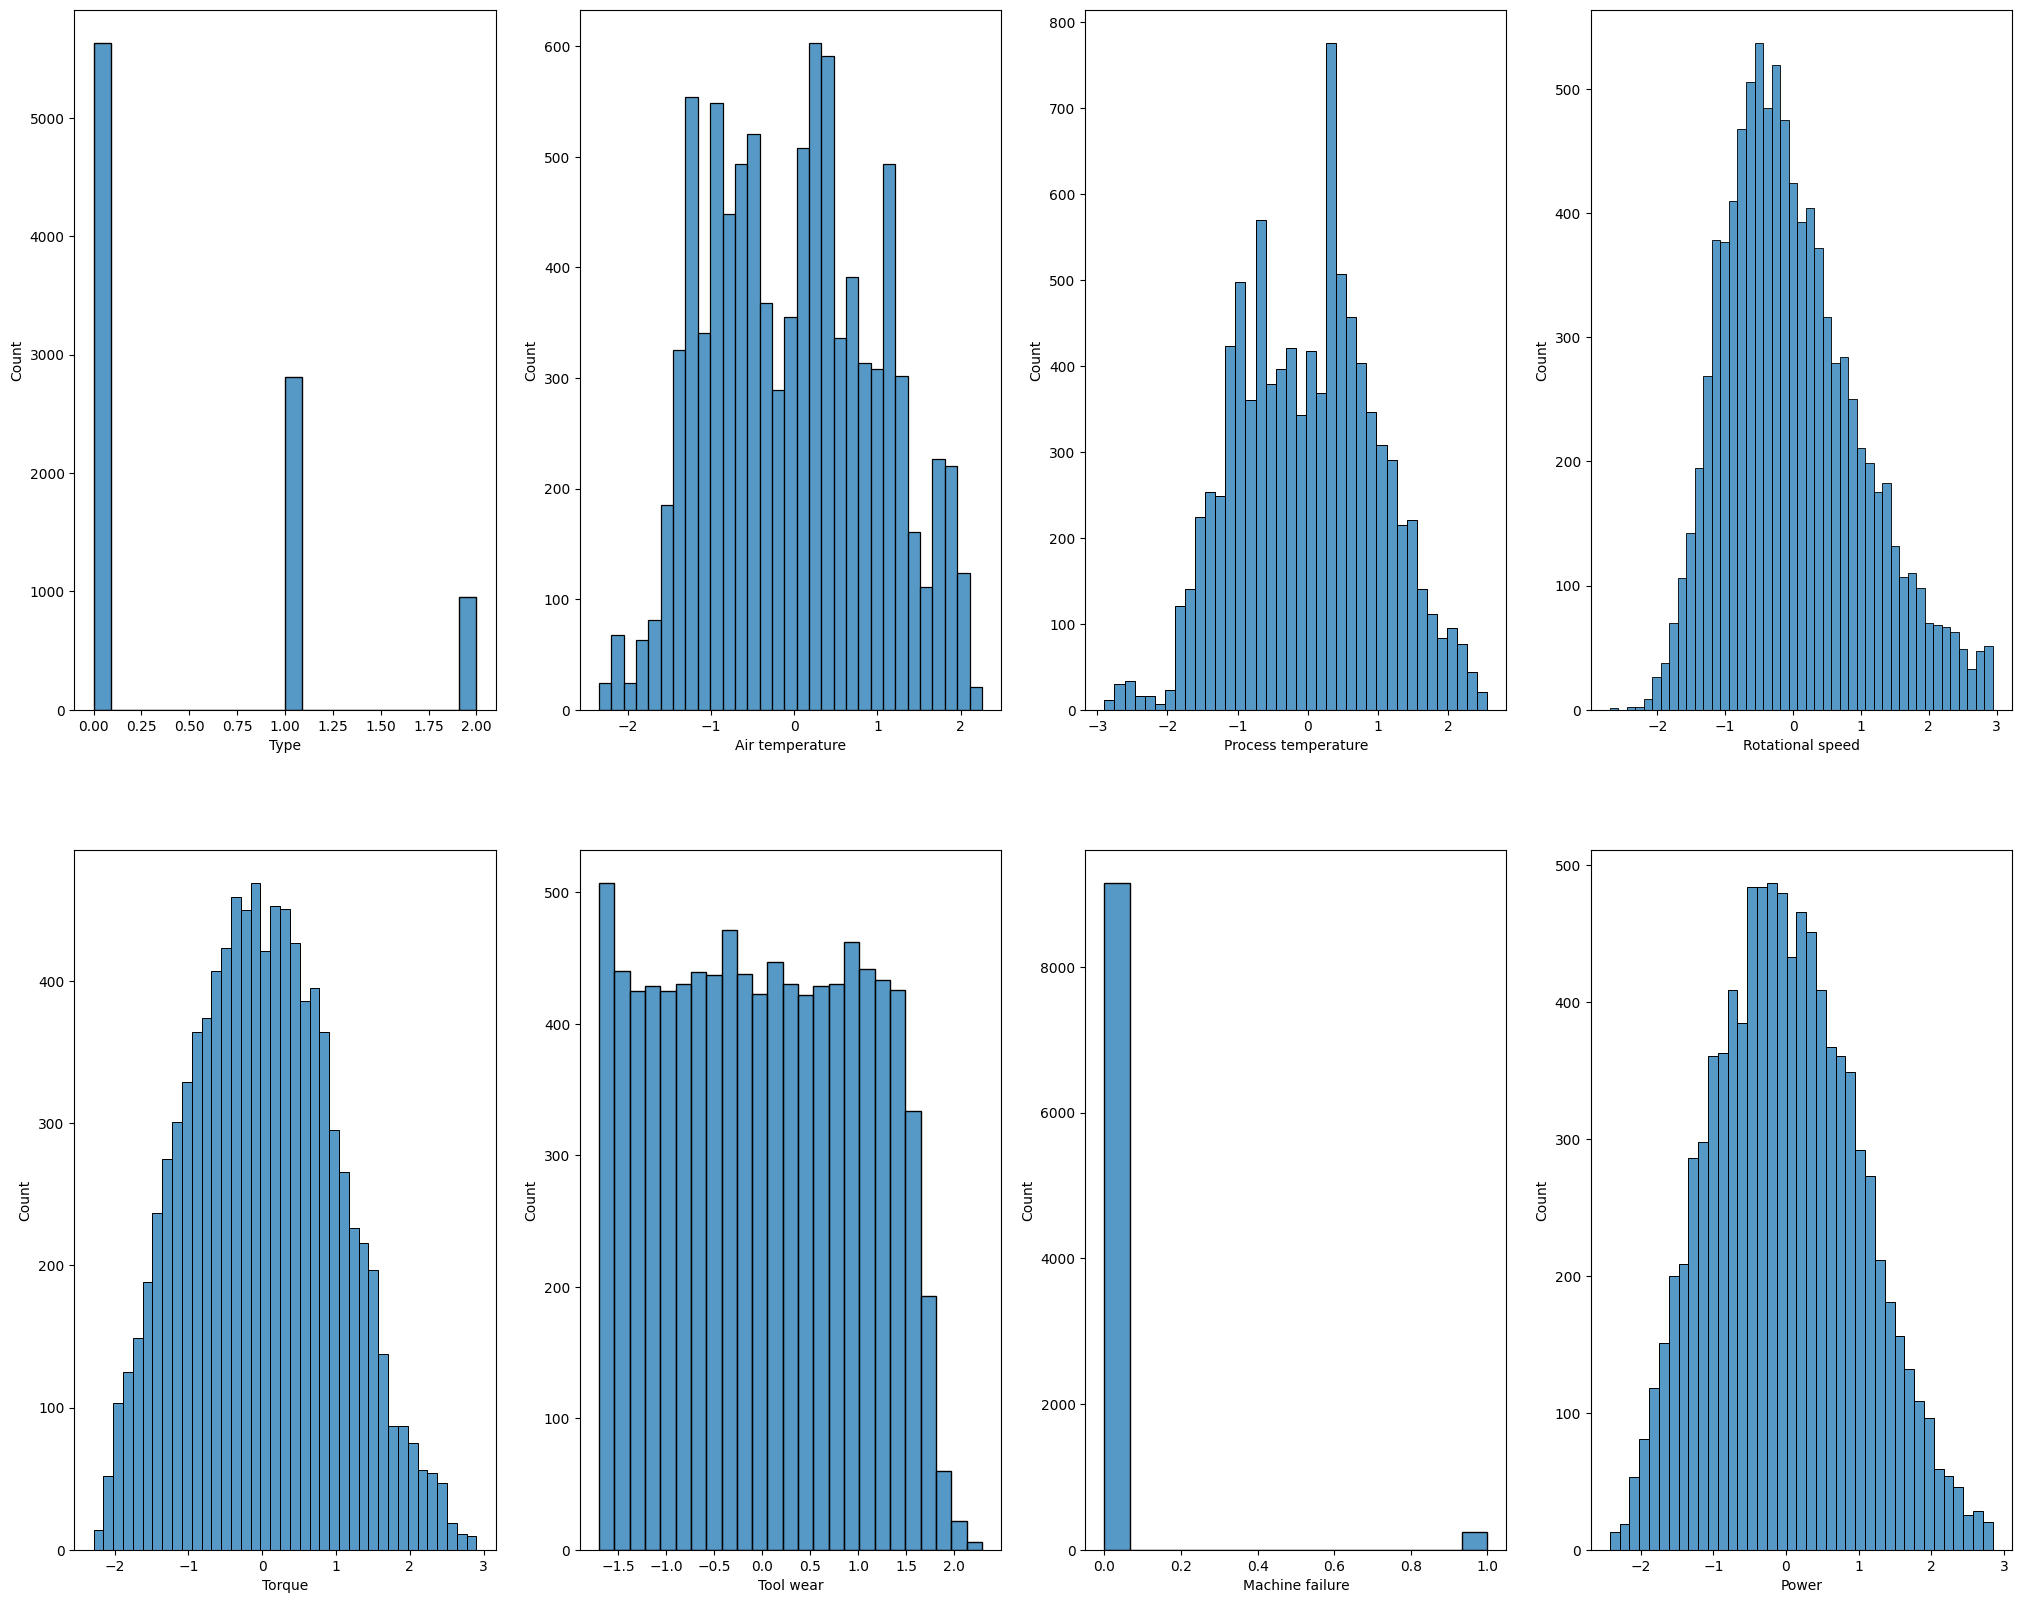

In [38]:
fig, ax = plt.subplots(2, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

#### Finding the correlation between the attributes with threshold = 0.3


<Axes: >

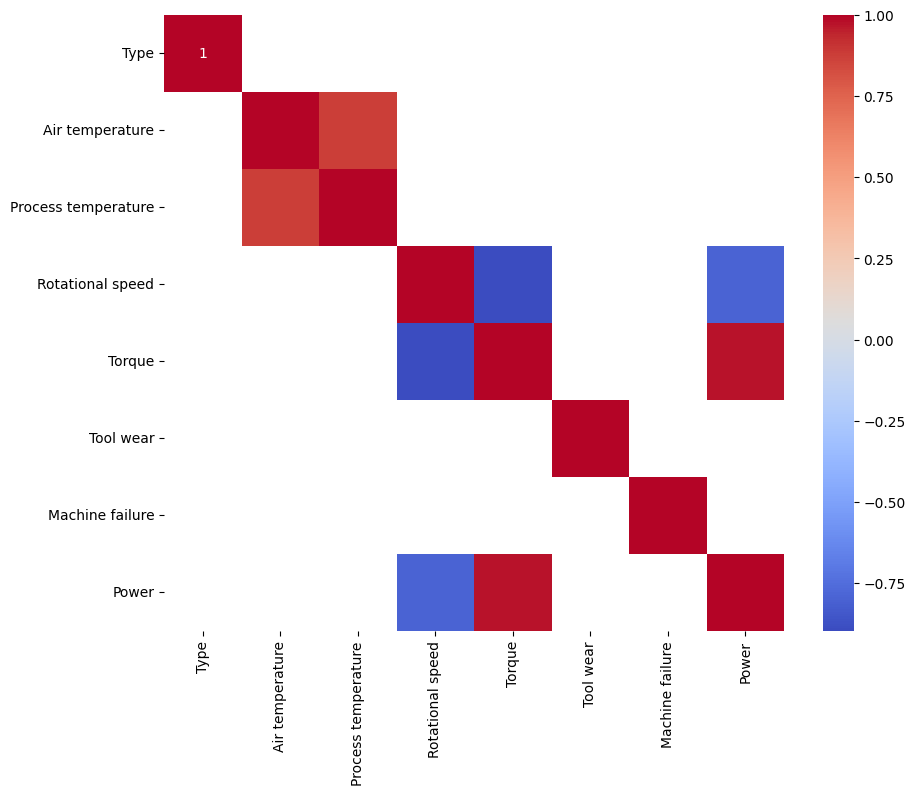

In [39]:
# There are strongly correlated features
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=matrix)

#### A scatter plot matrix to display the relationships between attributes in the dataset

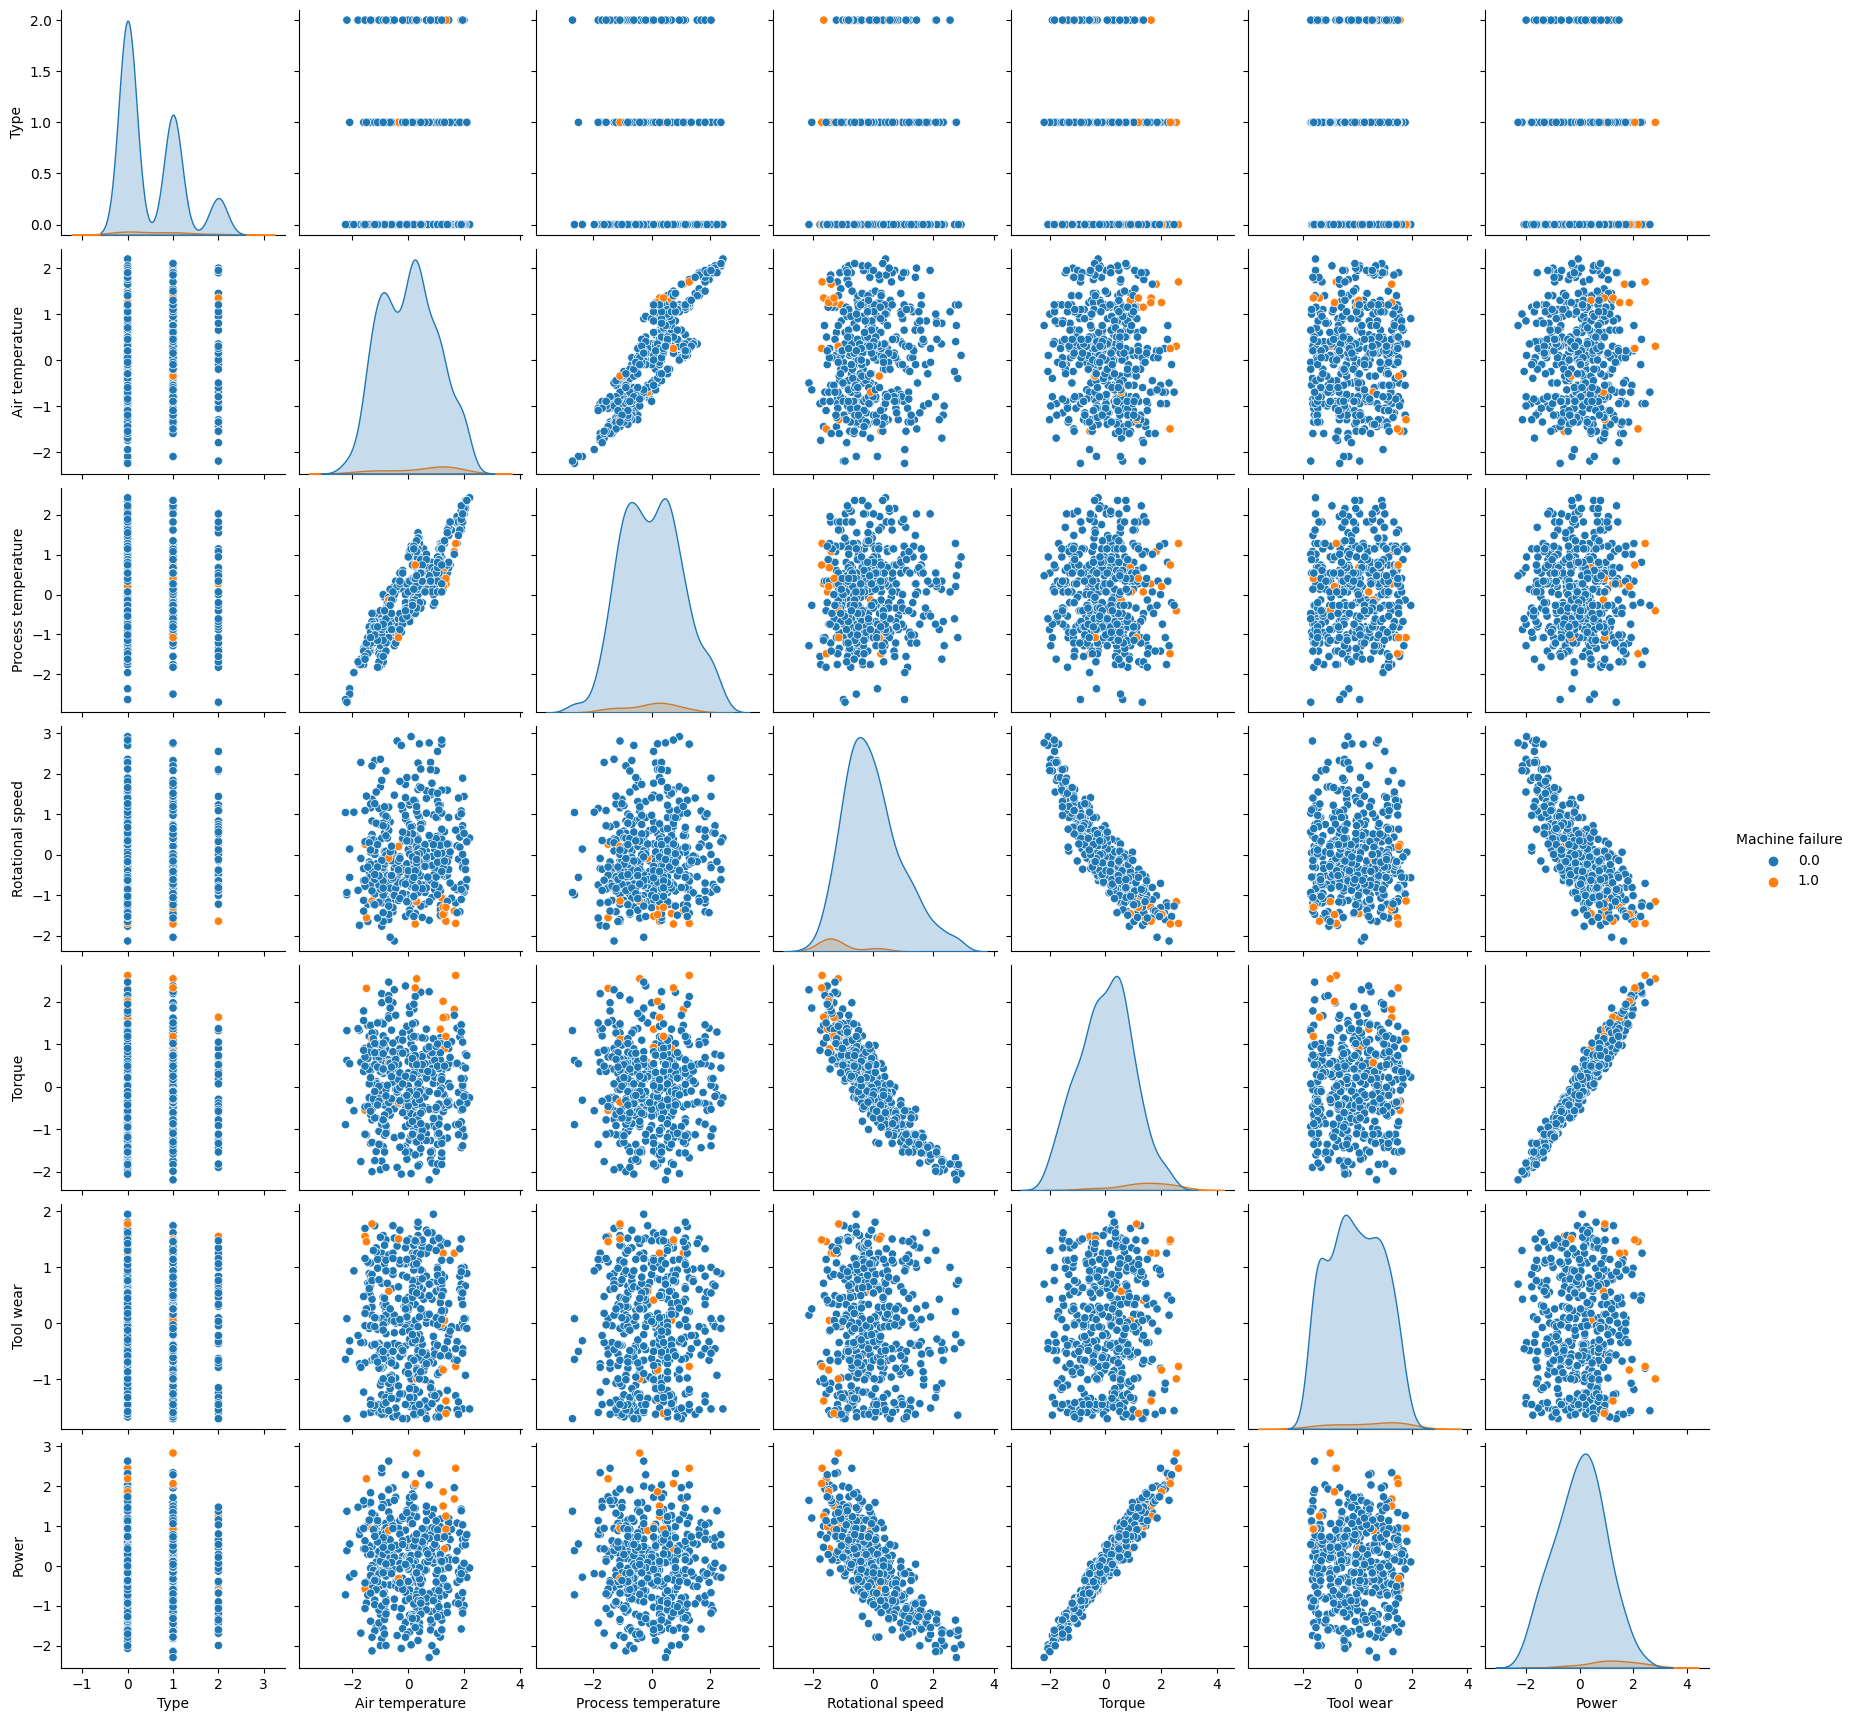

In [40]:
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')

Generate a profile report that includes (outliers, missing values, distributions, etc.) using [pandas-profiling](https://pandas-profiling.ydata.ai/docs/master/index.html)

In [41]:
df_profile = pdpf.ProfileReport(df, dark_mode=True)
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## What is it that we want out of this data?

# **Data Analytics** 📝

![Data Analysis](https://assets-global.website-files.com/5dcc6210881da483dfe6cda8/6139823c36f108e38af82fe9_data_analysis1000.png)


# Modeling 🧪

In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

## Data splitting and sampling 🧮

In [43]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power'],
      dtype='object')

Split the dataset (70% train : 30% test)

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

### Because the data is imbalanced, we oversample the training set

In [45]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
#oversample = RandomOverSampler(random_state=42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

Training set after oversampling

(array([6406.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6406.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

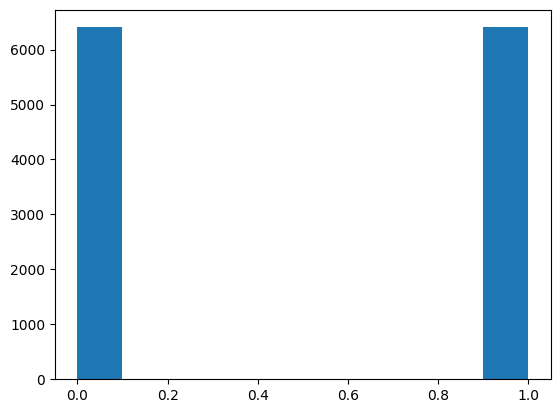

In [46]:
plt.hist(y_train)

## Decision Tree Model

Build the model

In [47]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [48]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.41      0.73      0.52        74

    accuracy                           0.96      2820
   macro avg       0.70      0.85      0.75      2820
weighted avg       0.98      0.96      0.97      2820



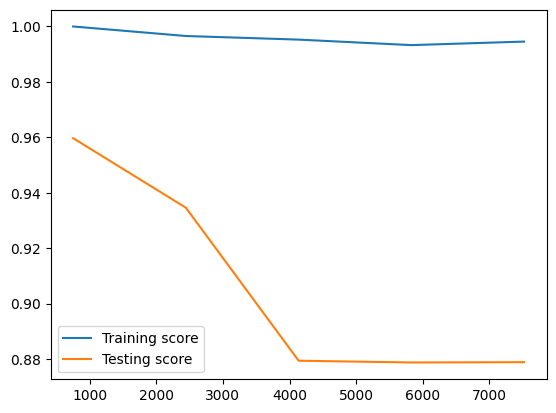

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Decision Tree model

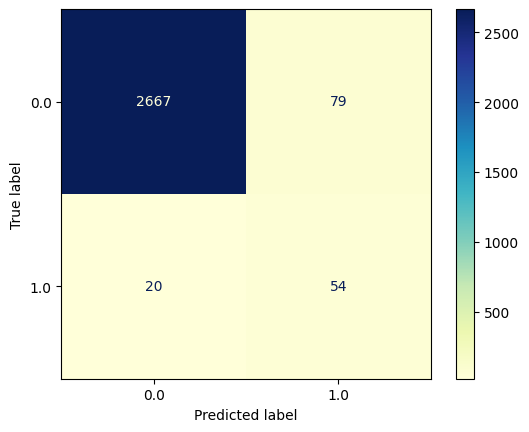

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [44]:
# from sklearn import tree

# data = tree.export_graphviz(model,
#                             feature_names=X.columns,  
#                             class_names=['No failure','TWF','HDF','PWF','OSF','RNF'],
#                             filled=True)

# # draw graph
# graph = graphviz.Source(data, format="png") 
# graph.render('nodes', view=False)
# graph

In [45]:
from sklearn.tree import export_text

rules = export_text(model)

# print the rules
print(rules)

|--- feature_3 <= -0.99
|   |--- feature_5 <= 1.08
|   |   |--- feature_1 <= 0.71
|   |   |   |--- feature_6 <= 2.41
|   |   |   |   |--- feature_4 <= 2.58
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  2.58
|   |   |   |   |   |--- feature_0 <= 0.61
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_0 >  0.61
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_6 >  2.41
|   |   |   |   |--- feature_0 <= 0.21
|   |   |   |   |   |--- feature_6 <= 2.78
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_6 >  2.78
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_0 >  0.21
|   |   |   |   |   |--- feature_2 <= 0.59
|   |   |   |   |   |   |--- feature_3 <= -1.70
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_3 >  -1.70
|   |   |   |   |   |   |   |--- feature_4 <= 2.32
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_4

## k-NN (K-nearest neighbors) Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'n_neighbors': 2}


Build the model

In [47]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [48]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.51      0.49      0.50        74

    accuracy                           0.97      2820
   macro avg       0.75      0.74      0.74      2820
weighted avg       0.97      0.97      0.97      2820



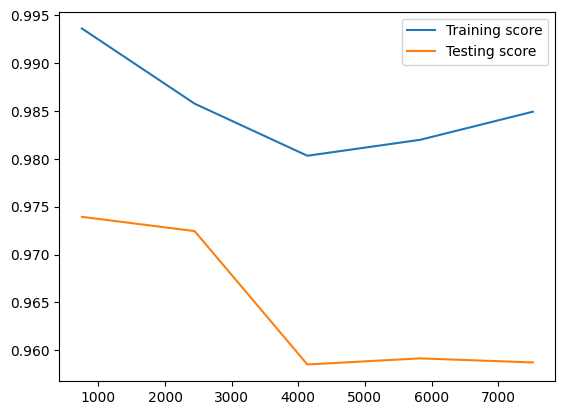

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of k-NN model

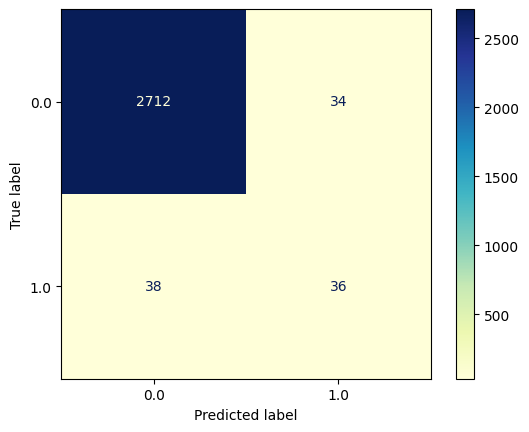

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## Random Forest Model

Build the model

In [51]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure


In [52]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.61      0.62      0.61        74

    accuracy                           0.98      2820
   macro avg       0.80      0.81      0.80      2820
weighted avg       0.98      0.98      0.98      2820



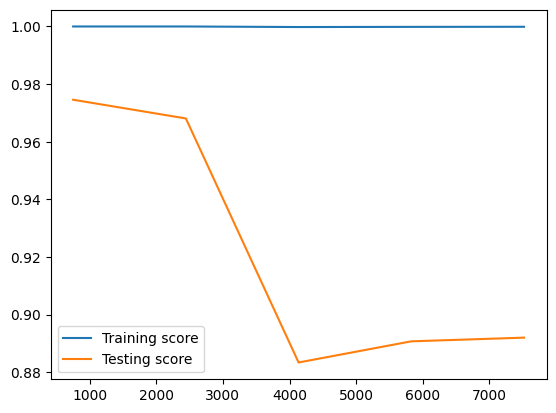

In [53]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Random Forest model

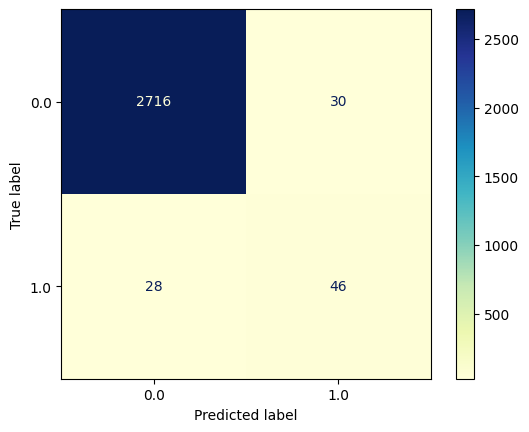

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## MLP (Multi-layer Perceptron) Model

Build the model

In [55]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [56]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2746
         1.0       0.51      0.74      0.61        74

    accuracy                           0.97      2820
   macro avg       0.75      0.86      0.80      2820
weighted avg       0.98      0.97      0.98      2820



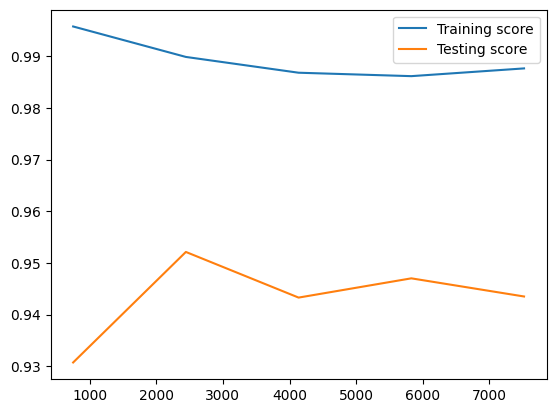

In [57]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

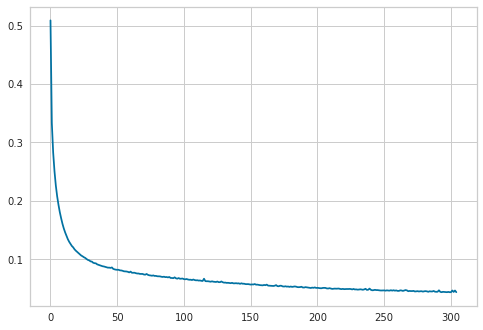

In [76]:
plt.plot(model.loss_curve_)

Confusion matrix of Multi-layer Perceptron model

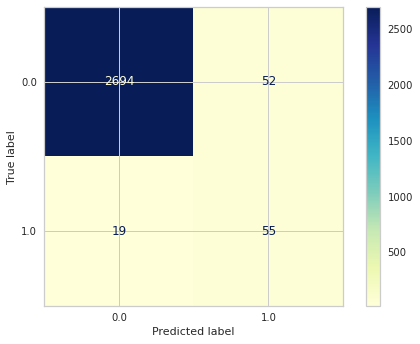

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

# **Evaluation** 🎲

In [65]:
model_performance

Accuracy  Precision    Recall  F1-Score  \
Decision Tree           0.964184   0.977002  0.964184  0.969210   
k-NN                    0.974468   0.973799  0.974468  0.974123   
Random Forest           0.979433   0.979705  0.979433  0.979566   
Multi-layer Perceptron  0.974823   0.980428  0.974823  0.977042   

                        Training time  Prediction time  
Decision Tree                0.144007         0.003994  
k-NN                         0.048007         0.220997  
Random Forest                1.045023         0.064008  
Multi-layer Perceptron      23.087450         0.004000

In [51]:
finalzied_model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)

In [54]:
dataset = pd.read_csv(dataset_path)

# rename dataset columns
dataset.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)
dataset['Power'] = dataset[['Rotational speed', 'Torque']].product(axis=1)

def z_score(feature, value):
    mean = np.mean(dataset[feature])
    std = np.std(dataset[feature])
    return (float(value) - mean) / std

def predict(air_temperature, process_temperature, rotational_speed, torque, tool_wear, type):
    # normalize the inputs
    air_temperature = z_score('Air temperature', air_temperature)
    process_temperature = z_score('Process temperature', process_temperature)
    rotational_speed = z_score('Rotational speed', rotational_speed)
    torque = z_score('Torque', torque)
    tool_wear = z_score('Tool wear', tool_wear)
    power = z_score('Power', torque * rotational_speed)

    mapping = {'L': 0, 'M': 1, 'H': 2}
    temp = [{'Type':mapping[type], 'Air temperature':air_temperature,
             'Process temperature':process_temperature, 'Rotational speed':rotational_speed,
             'Torque':torque, 'Tool wear':tool_wear, 'Power':power}]

    input_data = pd.DataFrame(temp) 
    prediction = finalzied_model.predict_proba(input_data)

    classes = ["No failure", "Machine failure"]
    prediction_dict = dict
    for record in prediction:
        prediction_dict = {classes[i] : record[i] for i in range(2)}
    
    maintenance = "No action required"
    if max(prediction_dict, key=prediction_dict.get) != "No failure":
        maintenance = "Need maintenance"

    return prediction_dict, maintenance


def display_output(predicted_output):
    predicted_output_df = pd.DataFrame.from_dict(predicted_output[0], columns=['Probability'], orient='index')
    predicted_output_df = predicted_output_df.reset_index().rename(columns={'index':'Failure or not'})
    
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x='Failure or not', y='Probability', data=predicted_output_df)
    for patch in ax.patches:
        ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
        ax.set_title(predicted_output[1])


def model_interaction(air_temperature, process_temperature, rotational_speed, torque, tool_wear, type):

    predicted_output = predict(
        air_temperature=air_temperature,
        process_temperature=process_temperature,
        rotational_speed=rotational_speed,
        torque=torque,
        tool_wear=tool_wear,
        type=type
    )
    display_output(predicted_output)
    

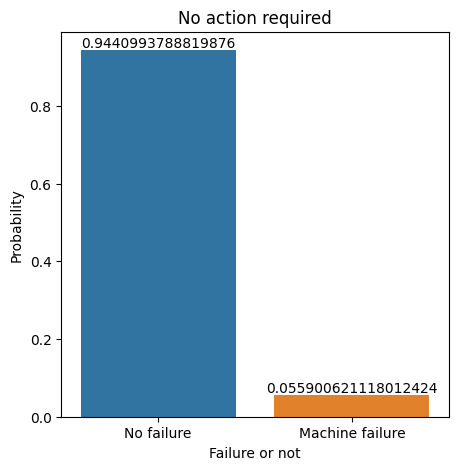

In [55]:
predicted_output = predict(
    air_temperature=308.6,
    process_temperature=308.7,
    rotational_speed=1551.0,
    torque=40.0,
    tool_wear=0.0,
    type='M'
)

display_output(predicted_output)

In [57]:
interact(
    model_interaction,
    air_temperature = widgets.FloatSlider(min=280, max=320, value = 0.1),
    process_temperature = widgets.FloatSlider(min=300, max= 320, value = 0.1),
    rotational_speed = widgets.FloatSlider(min=1000, max=3000, value = 1),
    torque = widgets.FloatSlider(min = 0, max = 100, value = 0.2),
    tool_wear = widgets.IntSlider(min = 0, max = 300, value = 1),
    type = widgets.Dropdown(options=['L', 'M', 'H'])
)

interactive(children=(FloatSlider(value=280.0, description='air_temperature', max=320.0, min=280.0), FloatSlid…

<function __main__.model_interaction(air_temperature, process_temperature, rotational_speed, torque, tool_wear, type)>

In [ ]:
widgets.Dropdown(
    options=['L', 'M', 'H'],
    value='2',
    description='Type:',
    disabled=False,
)

------------------------------------------------------------------------------------------------------------

# **THE END** #

# **Deployment** 📤

In [79]:
# build the Decision Tree classifier
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)

# save the model
pickle.dump(model, open('finalized_model.pkl', 'wb'))

Demo the predictive machine learning model using [Gradio](https://gradio.app/)

In [80]:
!pip install gradio --quiet

Load the saved model and the dataframe

In [81]:
loaded_model = pickle.load(open('/kaggle/working//finalized_model.pkl', 'rb'))

In [82]:
dataset = pd.read_csv(dataset_path)

# rename dataset columns
dataset.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)
dataset['Power'] = dataset[['Rotational speed', 'Torque']].product(axis=1)

In [83]:
import numpy as np

# normalize the feature using z-score normalization
def z_score(feature, value):
    mean = np.mean(dataset[feature])
    std = np.std(dataset[feature])
    return (float(value) - mean) / std

In [84]:
import gradio as gr
from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd

def predict(air_temperature, process_temperature, rotational_speed, torque, tool_wear, type):
    # normalize the inputs
    air_temperature = z_score('Air temperature', air_temperature)
    process_temperature = z_score('Process temperature', process_temperature)
    rotational_speed = z_score('Rotational speed', rotational_speed)
    torque = z_score('Torque', torque)
    tool_wear = z_score('Tool wear', tool_wear)
    power = z_score('Power', torque * rotational_speed)

    mapping = {'L': 0, 'M': 1, 'H': 2}
    temp = [{'Type':mapping[type], 'Air temperature':air_temperature,
             'Process temperature':process_temperature, 'Rotational speed':rotational_speed,
             'Torque':torque, 'Tool wear':tool_wear, 'Power':power}]

    input_data = pd.DataFrame(temp) 
    prediction = model.predict_proba(input_data)

    classes = ["No failure", "Machine failure"]
    prediction_dict = dict
    for record in prediction:
        prediction_dict = {classes[i] : record[i] for i in range(2)}
    
    maintenance = "No action required"
    if max(prediction_dict, key=prediction_dict.get) != "No failure":
        maintenance = "Need maintenance"

    return prediction_dict, maintenance

# create the user interface (inputs and outputs)
demo = gr.Interface(
    fn=predict,
    inputs=[gr.Slider(100, 350, label="Air temperature"),
            gr.Slider(100, 350, label="Process temperature"),
            gr.Number(label="Rotational speed"),
            gr.Number(label="Torque"),
            gr.Number(label="Tool wear"),
            gr.Radio(["L", "M", "H"], label="Type")],
    outputs=[gr.Label(num_top_classes=2, label="Result"), gr.components.Textbox(label="Action")]
)
demo.launch()

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://810fa2fa-6f71-467f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
